# Velocidad de caida libre de una pelota

En este ejercicio consideraremos el ejemplo de una pelota que se deja caer bajo la influencia de la fuerza de la gravedad y la resistencia del aire.

Consideraremos dos modelos matemáticos distintos (ambos basados en ecuaciones diferenciales) para describir la evolución de la velocidad $v$ de la pelota a lo largo del tiempo:

<ul id="top">
<li><a href="#1.-Modelo-simplificado">1. Modelo simplificado</a></li>
<li><a href="#2.-Modelo-más-realista">2. Modelo más realista</a></li>
</ul>  

En ambos casos, las unidades utilizadas son metros para la longitud, segundos para el tiempo, y kilogramos para la masa.

In [1]:
using Plots

## 1. Modelo simplificado

Según el modelo simplificado, la velocidad $v(t)$ (como función del tiempo $t$) satisface la siguiente ecuación diferencial

<a id='Edo-Simp'></a>
\begin{equation*}
\frac{d v}{dt} = -g - \frac{c}{M} \left|v\right|\, v, \hspace{10em} \tag{1}
\end{equation*}

donde $g$ es la aceleración de la gravedad, $M$ la masa de la pelota, y $c$ es un coeficiente asociado a la resistencia que ejerce el aire sobre la pelota. Dicha ecuación diferencial viene a decir que la aceleración de la pelota ($dv/dt$) es la suma de dos contribuciones: por un lado, la acceleración de la gravedad (con signo negativo, pues la gravedad atrae la pelota hacia abajo), y por otro, la acceleración debida a la resistencia del aire al movimiento de la pelota, que se supone de magnitud $\frac{c}{M}v^2$ y signo opuesto al de $v$.

El hecho de dejar caer la pelota libremente en el instante $t=0$ se traduce en la condición inicial

<a id='Cond-Ini'></a>
\begin{equation*}
v(0)= 0, \hspace{14em} \tag{2}
\end{equation*}


### 1.1- Ejercicio

- **¿Cual es la variable de estado?** ???


> La variable de estado es **v(t)**, la velocidad como función del tiempo 𝑡

- **¿Cual es la variable independiente?** ???

> La variable independiente es **t**, el tiempo

- **¿Cuales son los parámetros constantes del problema?** ???

> Los parametros constantes del problema son:
>g, la aceleracion de la gravedad (g=9.8m/s^2);
>M, la masa del cuerpo;
>c, parametro relativo a la resistencia al avance que ejerce el aire sobre el cuerpo (c depende de la densidad del aire, y de la forma, textura y orientacion del cuerpo que cae)

Se puede demostrar que

<a id='Sol'></a>
\begin{equation*}
v(t) = -v_T \, \frac{1-\exp(-2gt/v_T)}{1+\exp(-2gt/v_T)}, \hspace{7em} \tag{3}
\end{equation*}

donde $v_T = \sqrt{g \, M/c}$ (denominada velocidad terminal), es solución del problema de valor inicial [(1)](#Edo-Simp)-[(2)](#Cond-Ini). 

Consideremos el caso de una pelota de tenis, con

<a id='Par-Tenis'></a>
\begin{equation*}
M=0.058\, \mathrm{Kg},  \quad c = 29/90000. \hspace{7em} \tag{4}
\end{equation*}


### 1.2- Ejercicio
- **Calcular la velocidad terminal de la pelota de tenis**

In [2]:
g = 9.8
M = 0.058
c = 29/90000
vT = sqrt(g*M/c)

42.0

>**Respuesta**
>
>La velocidad terminal de la pelota de tenis es de 42 m/s.

### 1.3- Ejercicio

- **Definir una función (que llamaremos $vsol$) que toma como argumentos de entrada el tiempo $t$, y devuelve como valor de salida la velocidad $v(t)$ dada en [(3)](#Sol) (para los valores de los parámetros constantes de problema dados en [(4)](#Par-Tenis)).**

In [3]:
function vsol(t)
    aux = -42.0*((1-exp(-2*9.8*t/42.0))/(1+exp(-2*9.8*t/42.0)))#una variable auxiliar para evitar repetir cálculos 
    v = aux
    return v
end

vsol (generic function with 1 method)

- **Comprobar que la velocidad vsol(t) para t=50 es muy próxima a $-v_T$.** (El signo negativo de la velocidad terminal se refiere al sentido descendente del movimiento de la pelota).

In [4]:
print(vsol(50)) # podemos ver que vsol(50) = -41.999
print('\n')
print(-vT) # podemos ver que -vT = -42.0
print('\n')
print(round(vsol(50))==-vT)#por lo cual vsol(50) es muy proxima a -vT

-41.99999999382351
-42.0
true

>**Comprobación**
>
>Si la diferencia entre vsol(50.) y -vT resultara no ser pequeña, indicaría que se ha cometido algún error al implementar la función vsol(t)

- **Representar gráficamente la evolución de la velocidad de la pelota de tenis en el intervalo temporal $[0,30]$.**

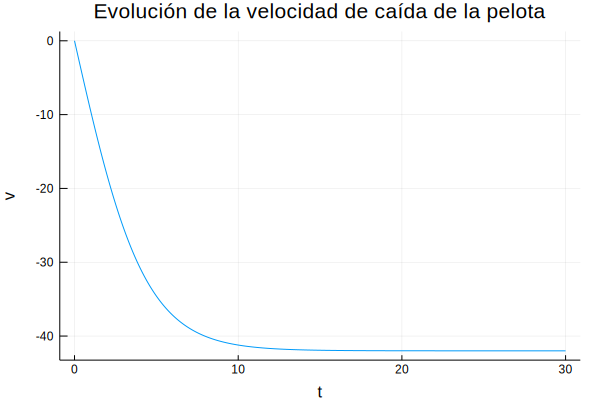

In [5]:
tF = 30
tt = range(0,tF,length=1000)
vv = vsol.(tt)
plot(tt,vv, title="Evolución de la velocidad de caída de la pelota", 
            xlabel="t", ylabel="v", label="")

Observese que a partir de un cierto tiempo la velocidad se mantiene muy cercana a la velocidad terminal.
>**Podemos ver que a partir de t~10, la velocidad se mantiene muy cercana a vT, la velocidad terminal.**

Para comprobar que efectivamente $v(t)$ dada por [(3)](#Sol) (la función $vsol(t)$ definida arriba) es solución de [(1)](#Edo-Simp)-[(2)](#Cond-Ini), hace falta verificar, por un lado, que $v(t)$ cumple la condición inicial [(2)](#Cond-Ini), y por otro lado, que $v(t)$ cumple la ecuación diferencial [(1)](#Edo-Simp):


### 1.4- Ejercicio
- **Comprobar que efectivamente $vsol(0)=0$.**

In [6]:
print(vsol(0) ==0)  # si 𝑣(𝑡) ==0, v(t) cumple la condición inicial (2)
                    # si 𝑣(𝑡) !=0, v(t) no cumple la condición inicial (2) 

true

### 1.5- Ejercicio

 Para comprobar que la función $v(t)$ definida en [(3)](#Sol) cumple la ecuación diferencial [(1)](#Edo-Simp) (es decir, la acceleración de la pelota según el modelo matemático simplificado  [(1)](#Edo-Simp), se pueden utilizar las reglas de derivación para obtener una expresión de la derivada respecto del tiempo del lado derecho de [(3)](#Sol), y comprobar que coincide (posiblemente después de algunas simplificaciones) con el resultado de substituir $v$ (en el lado derecho de la ecuación diferencial (1)) por la expresión de $v(t)$ dada en [(3)](#Sol). Aquí, proponemos de forma alternativa una comprobación de tipo numérico:
 
 
- **Para empezar, una vez fijados los valores de los parámetros constantes de los problema dados en [(4)](#Par-Tenis), definir una función (que llamaremos $f$) que toma como argumentos de entrada la velocidad $v$ y devuelve como valor de salida el lado derecho de la ecuación diferencial [(1)](#Edo-Simp). Probar la función f implementada evaluando f(-vT).**

In [7]:
f(v) = -g-(c/M)*abs(v)*v # Las funciones sencillas se pueden definir en una línea

f(-vT)

-1.7763568394002505e-15

>**Comprobación**
>
>En teoría, f(-vT) debería dar 0 como resultado. (Cuando la velocidad cae a la velocidad terminal, la acceleración de la gravedad y la debida a la resistencia del aire se cancelan una con la otra.) Sin embargo, puede que debido a errores de redondeo, no de exactamente 0. En todo caso debería de dar un número de valor absoluto muy pequeño. (En caso contrario, indicaría algún error en la implementación.)

Para comprobar de forma numérica que la función $v(t)$ definida en [(3)](#Sol) cumple la ecuación diferencial [(1)](#Edo-Simp), seguiremos el siguiente razonamiento:

Puesto que 
 
\begin{equation*}
\frac{d}{dt} vsol(t) := \lim_{\epsilon\to 0}\frac{vsol(t+\epsilon)-vsol(t)}{\epsilon},
\end{equation*}

para ver si $v = vsol(t)$ cumple la ecuación diferencial  [(1)](#Edo-Simp), tenemos que comprobar si para todo $t$ se cumple lo siguiente,

\begin{equation*}
\lim_{\epsilon\to 0}\frac{vsol(t+\epsilon)-vsol(t)}{\epsilon} = f(vsol(t)),
\end{equation*}

o de forma equivalente, si se cumple que para todo $t$, 

<a id='def-g'></a>
\begin{equation}
\lim_{\epsilon\to 0} G(t, \epsilon) = 0, \quad \mbox{donde} \quad
G(t,\epsilon) := \frac{vsol(t+\epsilon)-vsol(t)}{\epsilon}- f(vsol(t)). \tag{5}
\end{equation}

Para comprobar si se cumple  [(5)](#def-g):
- **Definir la función $G(t,epsilon)$ (utilizando para ello las funciones vsol(t) y f(v) previamente definidas).**

In [8]:
G(t,epsilon) = (vsol(t+epsilon)-vsol(t))/epsilon-f(vsol(t))

G (generic function with 1 method)

- **Representar la gráfica de la función $G(t,\epsilon)$ con respecto al tiempo para $\epsilon=0.01$ en el intervalo $t \in [0,30]$. Añadir en la misma figura la gráfica de la función $G(t,\epsilon)$ para $\epsilon=0.001$, y otra más para $\epsilon=0.0001$.** 

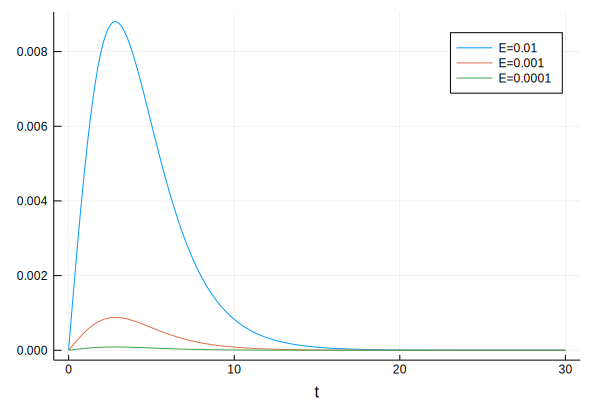

In [9]:
tF = 30
tt = range(0,tF,length=1000)# el intervalo t

ϵ = 0.01 #epsilon
gg = G.(tt,ϵ)
plot(tt,gg, xlabel="t", label="E=0.01")

ϵ = 0.001 #epsilon
gg = G.(tt,ϵ)
plot!(tt,gg, label="E=0.001")

ϵ = 0.0001 #epsilon
gg = G.(tt,ϵ)
plot!(tt,gg, label="E=0.0001")

- **¿Son las gráficas obtenidas compatibles con el cumplimiento de [(5)](#def-g)? Es decir, ¿son coherentes con la afirmación de que $v=vsol(t)$ satisface la ecuación diferencial [(1)](#Edo-Simp)?**

>**Respuesta**
        > Se puede observar que la function $G(t,\epsilon)$ esta muy cercana de 0 para valores de $\epsilon$ muy pequeños (<0.01). Por lo tanto las graficas obtenidas son compatibles con el cumplimiento de **(5)**! Podemos decir que v=vsol(t) satisface la ecuacion diferencial!

<a href="#top">Back to the top</a>

## 2. Modelo más realista

 Ahora consideramos un modelo más realista para describir la evolución de la velocidad  $v$  de la pelota a lo largo del tiempo. Consideraremos una pelota de ping-pong, de masa  $M=0.0028\, \mathrm{kg}$ y radio $R=0.02\, m$,  que cae libremente cerca del nivel del mar, con una aceleración de la gravedad  $g=9.8\, m/\mathrm{seg}^2$, densidad del aire $\rho = 1.205\,  \mathrm{kg}/m^3$, y viscosidad dinánica del aire
 $\mu = 1.789\times 10^{-5}\,  \mathrm{kg}/(m \, \mathrm{seg})$.
 

Según el modelo matemático que consideraremos a partir de ahora, la evolución de la velocidad de la pelota viene descrita por medio de la ecuación diferencial

<a id='Edo-Comp'></a>
\begin{equation*}
     \frac{d v}{dt} = -g - \frac{\rho\, \pi\, R^2\, C_D(Re)}{2\, M}\, \left|v\right|\, v, \hspace{5em} \tag{6}
\end{equation*}

con la condición inicial [(2)](#Cond-Ini),
donde 

\begin{equation*}
        Re = \frac{2\, \rho\, R}{\mu} |v|, \quad
        C_D(Re)  = \left\{
        \begin{split}
       \quad \frac{24}{Re} + \frac{2}{5} +\frac{6}{1+\sqrt{Re}} & \quad \mbox{ si  } Re>0,\\
       \quad 0  \phantom{ \frac{2}{5} +\frac{6}{1+\sqrt{Re}} }  & \quad\mbox{ si } Re=0.
        \end{split}
        \right. 
\end{equation*}

Aquí, $C_D(Re)$ es el coeficiente de arrastre de un fluído cualquiera sobre  una esfera de superficie suave, que es función del número de Reynols $Re$ (diréctamente proporcional a la magnitud de la velocidad $|v|$ de la esfera).

En comparación con el modelo más simplicificado considerado en el apartado anterior, en este nuevo modelo la resistencia del aire sobre la pelota se calcula de forma más precisa, tomando en lugar de la constante $c$ del modelo más simplificado, la expresión  $\frac{1}{2}\, \rho\, \pi\, R^2\, C_D(Re)$, que depende de forma no trivial del número de Reynols (y por tanto, depende de la magnitud $|v|$ de la velocidad. 

### 2.1- Ejericicio

Aquí, se requiere hacer lo siguiente:

- La ecuación diferencial de arriba permite determinar la aceleración de la pelota en un instante dado si se conoce la velocidad de la pelota en dicho instante. **Definir una función ac(v,p) que tenga como argumentos de entrada el valor concreto $v$ de la velocidad de la pelota y un vector $p$ que contenga los valores concretos de los parámetros del problema, y devuelva como argumento de salida el valor de la aceleración.**

In [10]:
function ac(v,p)
  M=p[1]
  g=p[2]
  R=p[3]
  mu=p[4]
  rho=p[5]
  aux1= (2*rho*R)/mu
  Re =  aux1*abs(v)
  if (Re>0)
        Cd =  24/Re+2/5+(6/(1+sqrt(Re)))
  else
        Cd = 0
  end
    aux1 = rho*pi*R^2*Cd
    aux2 = 2*M
    aceleracion = -g-((aux1)/(aux2))*abs(v)*v
    return aceleracion
end

ac (generic function with 1 method)

### 2.2- Ejercicio

- **Aplicar el método Euler con longitud de paso $h=1/200$ para obtener aproximaciones $v_j$ de la velocidad $v(t_j)$ de la pelota (donde $v(t)$ es la solución de la ecuación diferencial [(6)](#Edo-Comp) con la condición inicial [(2)](#Cond-Ini)) en los tiempos**

\begin{equation*}
  t_0=0, \  t_1=h, \  t_2 = 2h, \ldots, t_{3998}=3998h, \  
t_{3999}=3999h, \  t_{4000}=4000h=20.
\end{equation*}

In [11]:
M= 0.0028
g=9.8
R=0.02
mu=1.789e-5
pe= 1.205
p=[M,g,R,mu,pe]

tF = 20
n = 4000
h = tF/n

tt = 0:h:tF
vv = similar(tt)
vv[1] = 0.

for j in 1:n
    vv[j+1] = vv[j]+h*ac(vv[j],p)
end


**Representar gráficamente la evolución de la velocidad de la pelota en el intervalo temporal $[0,20]$.**

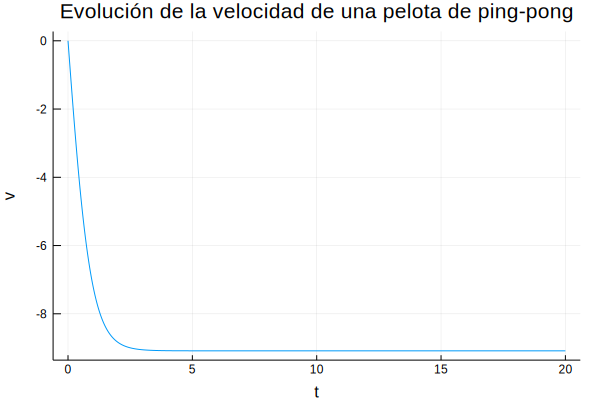

In [12]:
plot(tt,vv, title = "Evolución de la velocidad de una pelota de ping-pong", 
            xlabel="t", ylabel="v", label="")

### 2.3- Ejercicio

- **¿Las velocidades obtenidas en los tiempos finales (por ejemplo, en los últimos seis tiempos) es la misma?**

In [13]:
vv[length(vv)-5:length(vv)]

6-element Array{Float64,1}:
 -9.0851752041644
 -9.0851752041644
 -9.0851752041644
 -9.0851752041644
 -9.0851752041644
 -9.0851752041644

In [14]:
print(vv[length(vv)-5:length(vv)])==0
print('\n')
print(diff(vv[length(vv)-5:length(vv)]))

[-9.08518, -9.08518, -9.08518, -9.08518, -9.08518, -9.08518]
[0.0, 0.0, 0.0, 0.0, 0.0]

>**Respuesta**
> Podemos ver que las velocidades obtenidas en los 6 tiempos finales son iguales.

 - Esta velocidad es la que se denomina velocidad terminal, que denotaremos por $v_T$. Para dicha velocidad $v_T$, la aceleración de la gravedad y la resistencia del aire tienen la misma magnitud y signos opuestos, es decir, el lado derecho de la ecuación diferencial (la aceleración total) se anula cuando $v$ toma el valor de la velocidad terminal. **Comprobar si esto es efectivamente así, evaluando la función ac(v,p) para $v=v_{4000}$**

In [15]:
print(ac(vv[4000],p))


-1.7763568394002505e-13

- **Es dicha acceleración total efectivamente nula? Comentar el resultado obtenido.**

>**Respuesta**
>La acceleracion total no es totalemente nula. Pero el valor alcanzado es muy cercano de zero, por lo cual se puede concluir que la acceleracion total se acerca mucho a zero. 

### 2.4- Ejercicio

- En este punto consideramos de nuevo el modelo simplificado [(1)](#Edo-Simp).  Un criterio razonable para determinar el valor de $c$ apropiado para la pelota de ping-pong (al nivel del mar) es exigir que la velocidad terminal en el modelo simplificado coincida con la velocidad $v_T$ obtenida en el apartado anterior (Ejercicio 2.3). **Describir como se puede determinar el valor de $c$ que verifica dicho criterio.**

>**Respuesta**
>
> Para resolver este ejercicio hay despejar c en ecuacion (1). Como sabemos que vT no cambia, podemos acertar que dv/dt = 0. Por lo cual c se puede despejar de la siguiente manera en la ecuacion (1):
>
> -9.8-(c/0.0028)*(9.0851752041644*-9.0851752041644) = 0
>
> -(c/0.0028)*(9.0851752041644*-9.0851752041644) = 9.8
>
> (c/0.0028)*(9.0851752041644*-9.0851752041644) = -9.8
>
> (c/0.0028) = -9.8/(9.0851752041644*-9.0851752041644)
>
>c = -9.8/(9.0851752041644*-9.0851752041644)*0.0028 = 0.00033244322995086144

- **Calcular dicho valor de c**

In [16]:
# dt/dv = -g*(c/M)*|v|*v
# v = -9.0851752041644
# dv/dt = 0
# M = 0.0028
# g = 9.8

# -9.8-(c/0.0028)*(9.0851752041644)^2 = 0
# -(c/0.0028)*(9.0851752041644)^2 = 9.8
# (c/0.0028)*(9.0851752041644)^2 = -9.8
# (c/0.0028) = -9.8/(9.0851752041644^2)
c = -9.8/(9.0851752041644*-9.0851752041644)*0.0028

0.00033244322995086144

>**Comprobación**
>
>Debería obtenerse $c = 0.00033244322995086144$.
> 
>El valor encontrado de c es $c= 0.00033244322995086144$.
>


### 2.5- Ejercicio

- Una vez calculado el valor correcto de $c$, **representar gráficamente (en el intervalo temporal $t \in[0,20]$) la evolución de la velocidad de la pelota de ping-pong según la solución [(3)](#Sol) del modelo simplificado. Incluir dicha gráfica en una misma figura junto con la gráfica de la solución numérica obtenida (con el método de Euler) para el modelo más realista [(6)](#Edo-Comp).**

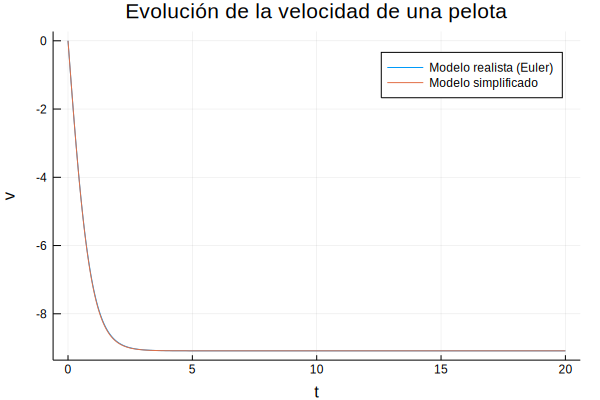

In [17]:
function vsol(t)
    vT = -sqrt(9.8*0.0028/0.00033244322995086144)
    aux = -vT*((1-exp(-2*9.8*t/vT))/(1+exp(-2*9.8*t/vT)))#una variable auxiliar para evitar repetir cálculos 
    v = aux
    return v
end

vs = vsol.(tt) # Velocidad de la pelota, según la solución del modelo simplificado
         # en los tiempos guardados en tt
plot(tt,vv, title = "Evolución de la velocidad de una pelota", 
            xlabel="t", ylabel="v", label="Modelo realista (Euler)")
plot!(tt,vs, label="Modelo simplificado")

La evolución de la velocidad del modelo simplificado y la de la simulación numérica del modelo más realista apenas se distinguen a simple vista en la figura obtenida (si son muy distintos, señal de que se ha cometido algún error). En la figura que sigue representamos la gráfica de la diferencia de ambas velocidades con respecto del tiempo, donde se puede apreciar la diferencia de los resultados para ambos modelos.

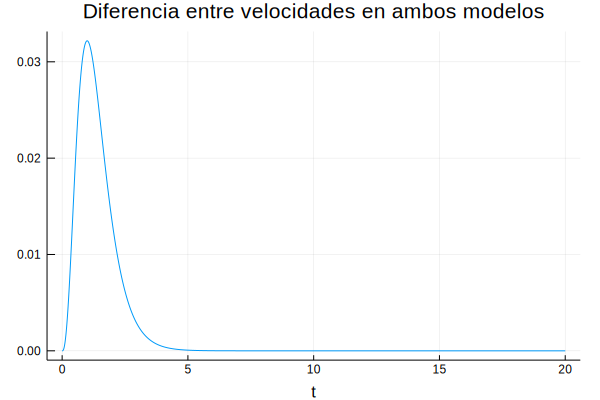

In [18]:
plot(tt,vv-vs, title="Diferencia entre velocidades en ambos modelos", xlabel="t", label="")

### 2.6-Ejercicio

- Los valores $\mu = 1.789\times 10^{-5} \, \mathrm{kg}/(m\, \mathrm{seg})$ de la viscosidad dinámica del aire y de su densidad $\rho = 1.205\,  \mathrm{kg}/m^3$ dados al principio del enunciado de este problema se refieren a los valores estandar de la atmósfera al nivel del mar. En cambio, a $3000\, m$ de altura, $\mu = 1.69\times 10^{-5}\,  \mathrm{kg}/(m\, \mathrm{seg})$,  $\rho = 0.9\, \mathrm{kg}/m^3$. **Repetir la simulación de la evolución de la velocidad de la pelota de ping-pong (con el modelo más realista) pero esta vez a $3000\, m$ de altura. Representar en una misma figura los resultados de la simulación de las velocidades al nivel del mar y a $3000\, m$ de altura.**

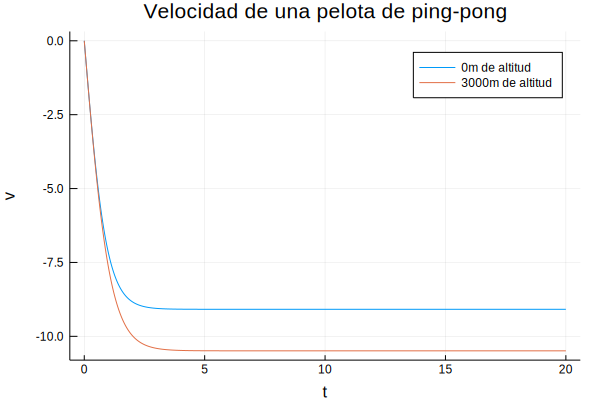

In [19]:
mu=1.69e-5
pe= 0.9
p=[M,g,R,mu,pe]

tF = 20
n = 4000
h = tF/n
tt = 0:h:tF
vv3000 = similar(tt)
vv3000[1] = 0.
for j in 1:n
    vv3000[j+1] = vv3000[j]+h*ac(vv3000[j],p) 
end
plot(tt,vv, title = "Velocidad de una pelota de ping-pong", 
            xlabel="t", ylabel="v", label="0m de altitud")
plot!(tt,vv3000, label="3000m de altitud")

In [20]:
print(tt[minimum(findall(x->x == vv[end],vv))])
print("\n")
print(tt[minimum(findall(x->x == vv3000[end],vv3000))])
print("\n")
print(abs(tt[minimum(findall(x->x == vv[end],vv))]-tt[minimum(findall(x->x == vv3000[end],vv3000))]))

15.505
17.935
2.429999999999998

In [21]:
print("Velocidad terminal nivel del mar (0m):",string(vv[end]))
print("\n")
print("Velocidad terminal en altitud (3000m):",vv3000[end])
print("\n")
print("Diferencia velocidad terminal entre 0 y 3000m: ",round(abs(vv[end]-vv3000[end])*100)/100," m/s")

Velocidad terminal nivel del mar (0m):-9.0851752041644
Velocidad terminal en altitud (3000m):-10.490322027616582
Diferencia velocidad terminal entre 0 y 3000m: 1.41 m/s

- **¿Son las diferencias apreciables? Es la velocidad terminal distinta en un caso y en otro?**


>**Respuesta**
> Las diferencias son apreciables en 2 niveles. 1) A 0 m de altitud la pelota de ping pong alcanza su velocidad terminal aprox 2.43 s antes que a 3000m de altitud. 2) A 3000 m de altitud la velocidad terminal es mas alta (aprox. +1.41m/s) que a 0 m de altitud. Asi, relativo a una altitud de 0m, una pelota de ping pong tarda mas para alcanzar su velocidad terminal y la velocidad alcanzada esta mas alta durante una caida desde 3000m de altitud. 

<a href="#top">Back to the top</a>

### 2.7- Valoración

_Incluir aquí los comentarios de valoración de la tarea a entregar (dificultad, interés, etc, incluidas, si se quiere, sugerencias de mejora del ejercicio), así como una estimación del tiempo dedicado al trabajo de la semana (desglosado en el tiempo de estudio de material teórico, tiempo de dedicación a la participación activa o pasiva en los foros, tiempo de implementación y experimentación con los problemas prácticos planteados, y tiempo de preparación del documento jupyter a entregar)._

>Dificultad de la tarea: **Mediana**
>
>Interes: **Alto**, me ha gustado mucho. Estoy muy interesado en el tema de los **modelos matematicos** y las $ecuaciones$ $diferenciales$ $ordinarias$. Tambien me ha gustado mucho aprender a usar julia y el trabjao con jupyter. Tengo el sentimiento de haber aprendido mucho gracias a este ejercicio y a los comentarios de los companieros en el foro!
>
>Estimacion del tiempo dedicado: estudio material teorico ($2h$), participacion en el foro ($1h$), implementacion y experimentacion con el problema practio planteado ($12h$), preparacion del documento jupyter ($2h$).
>
>Se me ha desconectado el servicio juliabox, y habia temporadas bastante largas durante cuales no fuese accessible (~30min). Entiendo la necessidad de poder trabajar en modo cross-platamformas, por lo cual no es una surgerencia de mejora, simplemente me gustaria commentarlo aqui.
